In [1]:
import cairo
from IPython.display import Image, display
from io import BytesIO

def disp(draw_func):
    surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, 200, 200)
    ctx = cairo.Context(surface)
    draw_func(ctx, 200, 200)
    with BytesIO() as fileobj:
        surface.write_to_png(fileobj)
        display(Image(fileobj.getvalue(), width=200))

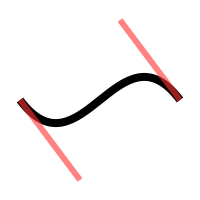

In [2]:
@disp
def draw(cr, width, height):
    cr.scale(width, height)
    cr.set_line_width(0.04)

    x, y = 0.1, 0.5
    x1, y1 = 0.4, 0.9
    x2, y2 = 0.6, 0.1
    x3, y3 = 0.9, 0.5

    cr.move_to(x, y)
    cr.curve_to(x1, y1, x2, y2, x3, y3)

    cr.stroke()

    cr.set_source_rgba(1, 0.2, 0.2, 0.6)
    cr.set_line_width(0.03)
    cr.move_to(x, y)
    cr.line_to(x1, y1)
    cr.move_to(x2, y2)
    cr.line_to(x3, y3)
    cr.stroke()

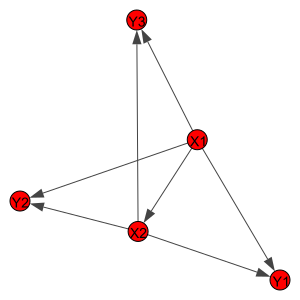

In [6]:
import igraph as ig

g1 = ig.Graph(directed=True)
g1.add_vertices(["X1","X2","Y1","Y2","Y3"])
g1.add_edges([(0,1),(0,2),(0,3),(0,4),(1,2),(1,3),(1,4)])
g1.vs["label"]=g1.vs["name"]

g2 = ig.Graph(directed=True)
g2.add_vertices(["X1","X2","Y1","Y2","Y3"])
g2.add_edges([(0,1),(0,2),(0,3),(0,4),(1,2),(1,3),(1,4),(2,3)])
g2.vs["label"]=g1.vs["name"]

g3 = ig.Graph(directed=True)
g3.add_vertices(["X1","X2","Y1","Y2","Y3"])
g3.add_edges([(1,0),(0,2),(0,3),(0,4),(1,2),(1,3),(1,4)])
g3.vs["label"]=g1.vs["name"]


ig.plot(g1, layout=g1.layout("kk"), bbox=(300,300), margin=20)
#ig.plot(g2, layout=g1.layout("kk"), bbox=(300,300), margin=20)
#ig.plot(g3, layout=g1.layout("kk"), bbox=(300,300), margin=20)


In [5]:
import numpy as np
def get_path_matrix(A):
    A=np.array(A)
    p=A.shape[0]
    A_power=np.zeros((p,p))
    for i in range(p):
        A_power= A_power + np.linalg.matrix_power(A,(i+1))

    return np.logical_or(np.greater(A_power, np.zeros((p,p))),np.eye(p).astype(bool))

g1 = ig.Graph(directed=True)
g1.add_vertices(["X1","X2","Y1","Y2","Y3"])
g1.add_edges([(0,1),(0,2),(0,3),(0,4),(1,2),(1,3),(1,4)])

A=g1.get_adjacency()
A=np.array(A.data)
get_path_matrix(A)

array([[ True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False, False,  True, False, False],
       [False, False, False,  True, False],
       [False, False, False, False,  True]])

In [ ]:
def get_sid(G,H):
    import numpy as np
    p=G.shape[0]
    incorrectCausalEffects = np.zeros((p,p))
    pathMatrix = get_path_matrix(G)
    for i in range(p):
        paG= G[:,i]==1
        paH= H[:,i]==1
        G_tilde= 0 # TODO
        pathMatrix2 = get_path_matrix(G_tilde)
        rechableOnNonDirectedPath = rondp(G,i,paH,pathMatrix,pathMatrix2)
        for j in (j for j in range(p) if j!=i):
            ijGNull=False
            ijHNull=False
            finished=False
            if pathMatrix[i,j]==0 :
                ijGNull =True  # G predicts the causal effect to be zero
            if paH[j]:
                ijHNull = True  # H predicts the causal effect to be zero
            if (not ijGNull) and ijHNull:
                incorrectCausalEffects[i,j]=1
                finished=True # one mistake if only H predicts zero
            if ijGNull and ijHNull or paG==paH:
                finished= True   # no mistakes if both predictions coincide
            if not finished:
                childrenOnDirectedPath = G[i,:]==1 # TODO
                if np.sum(pathMatrix[childrenOnDirectedPath,paH])>0:
                    incorrectCausalEffects[i,j]=1
                if rechableOnNonDirectedPath[j]==1:
                    incorrectCausalEffects[i,j]=1

    return np.sum(incorrectCausalEffects)


def rondp(G,i,paH, pathMatrix, pathMatrix2):
    import numpy as np
    p=G.shape[0]
    Pai= G[:,i]==1
    Chi = G[i,:]==1
    toCheck = Pai +p and Chi
    rechableNodes = Pai and Chi
    reachableOnNonDirectedPath = Pai + p
    G[i,Chi]=0
    G[i,Pai]=0
    for currentNode in toCheck:
        PacN = G[:,currentNode]==1
        PacN2 = PacN

In [2]:
import pyAgrum as gum
bn=gum.BayesNet("WaterSprinklers")
c=bn.add(gum.LabelizedVariable("c","cloudy ?",2))
s, r, w = [ bn.add(name, 2) for name in "srw" ]
for link in [(c,s),(c,r),(s,w),(r,w)]:
    bn.addArc(*link)


import pyAgrum.lib.notebook as gnb
bn

(gum::BayesNet<double>@0000015AC4B02440) BN{nodes: 4, arcs: 4, domainSize: 16, dim: 18}

In [3]:
bn.cpt("c").fillWith([0.4,0.6])
bn.cpt(s)[:]=[ [0.5,0.5],[0.9,0.1]]
bn.cpt(w)[0,0,:] = [1, 0] # r=0,s=0
bn.cpt(w)[0,1,:] = [0.1, 0.9] # r=0,s=1
bn.cpt(w)[1,0,:] = [0.1, 0.9] # r=1,s=0
bn.cpt(w)[1,1,:] = [0.01, 0.99] # r=1,s=1

bn.isIndependent("s","r","c")

True

In [4]:
bn2=gum.fastBN("A->B<-C->D->E<-F<-A;C->G<-H<-I->J")
bn2
gum.MarkovBlanket(bn2,"C")

<pyAgrum.pyAgrum.MarkovBlanket; proxy of <Swig Object of type 'gum::MarkovBlanket *' at 0x0000015AC6B5F060> >

In [5]:
bnOut =gum.fastMN("C_pv-CAPEX;C_pv-TOTEX;C_bat-Cap_bat;Dem-Cap_pv;Dem-TOTEX;C_buy-TOTEX;C_buy-CAPEX;Cap_pv-Cap_bat;Cap_pv-OG;Cap_bat-OG;OG-CAPEX;CAPEX-Cap_pv;CAPEX-TOTEX;TOTEX-Cap_pv")
bnOut

(gum::MarkovNet<double>@0000015AD5115100) MN{nodes: 9, edges: 14, domainSize: 512, dim: 56}

In [6]:
bnTrue =gum.fastMN("C_pv-CAPEX;C_pv-Cap_pv;C_bat-Cap_bat;C_bat-CAPEX;Dem-Cap_pv;Dem-TOTEX;Dem-Cap_bat;Dem-CAPEX;C_buy-TOTEX;C_buy-OG;Cap_pv-Cap_bat;Cap_pv-OG;Cap_bat-OG;OG-CAPEX;CAPEX-TOTEX")
bnTrue

(gum::MarkovNet<double>@0000015AD510FC00) MN{nodes: 9, edges: 15, domainSize: 512, dim: 60}

In [9]:
bnOut.isIndependent("C_pv","Cap_pv",["CAPEX","TOTEX"])


True

In [3]:
import Model
import numpy as np
# get settings for HouseModel
settings = Model.getSettings()

def get_model_matrix(settingsDict):
    # Defined for t=24
    t=24
    #x= [Cap_PV, Cap_Bat, P_buy_t, P_PV_t, P_Bat_t, P_Bat_in_t, P_bat_out_t]
    x=2+5*t
    availability_pv=[0.1]*t
    DemandVal= [0.314]*t
    c = np.array([[t*settingsDict["cost_PV"]/(settingsDict["lifetime"]*8760)]+  [t*settingsDict["cost_Battery"]/(settingsDict["lifetime"]*8760)]+ [settingsDict["cost_buy"]]*t])
    i=0
    A= np.zeros((8*t,x))
    b=np.zeros(8*t)
    # PV Lim : 2*t*Equations : P_PV_t - Avail*Cap_PV <=0 ; -P_PV_t<=0
    for j in range(t):
        A[i,0]=-availability_pv[j]
        A[i,2+t+j]=1
        A[i+1,2+t+j]=-1
        i+=2
    # Bat Lim EQ : t*Equations : P_Bat_t - Cap_Bat <=0; -P_Bat_t<=0
    for j in range(t):
        A[i,1]=-1
        A[i,2+2*t+j]=1
        A[i+1,2+2*t+j]=-1
        i+=2
    # Energy Balance : 2*t*Equations : P_bat_out_t - P_bat_in_t +P_PV_t+ P_Buy == Dem_t
    for j in range(t):
        A[i,2+j]=1 # P_buy_t
        A[i,2+j+t]=1 # P_PV_t
        A[i,2+j+3*t]=-1 # P_Bat_IN_t
        A[i,2+j+4*t]=1 # P_Bat_Out_t
        b[i]=DemandVal[j]
        # Equation not InEquation
        A[i+1,2+j]=-1 # P_buy_t
        A[i+1,2+j+t]=-1 # P_PV_t
        A[i+1,2+j+3*t]=1 # P_Bat_in_t
        A[i+1,2+j+4*t]=-1 # P_Bat_out_t
        b[i+1]=-DemandVal[j]
        i+=2
    # Battery EQ : 2t*Equations : P_bat_t == P_bat_t-1 + P_bat_in_t -P_bat_out_t
    for j in range(t):
        A[i,2+j+2*t]=-1 # P_bat_t
        if j==0: # t=0 == t=T
            A[i,2+j+3*t-1]=1 # P_Bat_t-1
        else:
            A[i,2+j+2*t-1]=1 # P_Bat_t-1
        A[i,2+j+3*t]=1 # P_Bat_in_t
        A[i,2+j+4*t]=-1 # P_Bat_out_t
        #Equation not inEquation
        A[i+1,2+j+2*t]=1 # P_bat_t
        if j==0: # t=0 == t=T
            A[i+1,2+j+3*t-1]=-1 # P_Bat_t-1
        else:
            A[i+1,2+j+2*t-1]=-1 # P_Bat_t-1
        A[i+1,2+j+3*t]=-1 # P_Bat_in_t
        A[i+1,2+j+4*t]=1 # P_Bat_out_t
        i+=2

    return c, A
c, A= get_model_matrix(settings)
np.savetxt("A.csv",A,delimiter=",")